# Problem Definition

We will investigate the the miles per gallon (mpg) for cars with a number of features.
The data was downloaded from the UCI Machine learning repository.

Number of Instances: 398

Number of Attributes: 9 including the class attribute

Attribute Information:

1. mpg:           continuous
2. cylinders:     multi-valued discrete
3. displacement:  continuous
4. horsepower:    continuous
5. weight:        continuous
6. acceleration:  continuous
7. model year:    multi-valued discrete
8. origin:        multi-valued discrete
9. car name:      string (unique for each instance)

Missing Attribute Values: horsepower has 6 missing values

References Source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [68]:
# Load libraries
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import timeit
# data manipulation 
import numpy as np
import pandas as pd
# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
sn.set(rc={"figure.figsize": (8, 6)});
# setting params
params = {'legend.fontsize': 'x-large','figure.figsize': (30, 10),'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large','xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
sn.set_style('whitegrid')
sn.set_context('talk')
plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# Load the Dataset

In [69]:
# Load dataset
filename = 'c:/users/Seid/Desktop/capstone001/auto-mpg.csv'
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin',
       'car_name']
dataset = pd.read_csv(filename,index_col='car_name',names=names)

# Analyze Data

Descriptive Statistics

In [70]:
#The shape of the original dataset
#We have 398 instances and 8 attributes including the output attribute mpg
print("Shape of dataset::{}".format(dataset.shape))

Shape of dataset::(398, 8)


In [71]:
#types
print(dataset.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object


In [72]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [73]:
dataset[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,weight,acceleration
count,398.00,398.00,398.00,398.00
mean,23.51,193.43,2970.42,15.57
std,7.82,104.27,846.84,2.76
min,9.00,68.00,1613.00,8.00
25%,17.50,104.25,2223.75,13.83
50%,23.00,148.50,2803.50,15.50
75%,29.00,262.00,3608.00,17.17
max,46.60,455.00,5140.00,24.80


Cleanup horsepower column

In [74]:
#check if there is null value
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [75]:
# types
print(dataset.dtypes)


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object


As we see from the data types the horsepower has an object dtype. So let's investigate further by looking at the unique values further. 

In [76]:
print(dataset.horsepower.unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [77]:
#We see that we have to remove the unknown value '?' 
#Once we removed it we will check if we have any
dataset = dataset[dataset.horsepower != '?']
print('?' in dataset.horsepower)


False


In [78]:
#The shape of updated dataset
print("Shape of dataset::{}".format(dataset.shape))

Shape of dataset::(392, 8)


# Typecast Attributes

In [79]:
#Continuous variable
dataset.horsepower = dataset.horsepower.astype('float')
# categorical variables
#dataset['cylinders'] = dataset.cylinders.astype('category')
#dataset[' model_year'] = dataset.model_year.astype('category')
#dataset['origin'] = dataset.origin.astype('category')
#num_dataset=dataset[["mpg", "displacement","horsepower","weight","acceleration"]]


In [80]:
print(dataset.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object


In [81]:
#descriptions
pd.set_option('precision',1)
dataset[["mpg", "displacement","horsepower","weight","acceleration"]].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.0,392.0,392.0,392.0,392.0
mean,23.4,194.4,104.5,2977.6,15.5
std,7.8,104.6,38.5,849.4,2.8
min,9.0,68.0,46.0,1613.0,8.0
25%,17.0,105.0,75.0,2225.2,13.8
50%,22.8,151.0,93.5,2803.5,15.5
75%,29.0,275.8,126.0,3614.8,17.0
max,46.6,455.0,230.0,5140.0,24.8


In [82]:
#correlation
#Many of the attributes have strong correlations cylinders,displacement,weight and horspower with >.80
pd.set_option('precision',2)
print(dataset.corr(method='pearson'))

               mpg  cylinders  displacement  horsepower  weight  acceleration  \
mpg           1.00      -0.78         -0.81       -0.78   -0.83          0.42   
cylinders    -0.78       1.00          0.95        0.84    0.90         -0.50   
displacement -0.81       0.95          1.00        0.90    0.93         -0.54   
horsepower   -0.78       0.84          0.90        1.00    0.86         -0.69   
weight       -0.83       0.90          0.93        0.86    1.00         -0.42   
acceleration  0.42      -0.50         -0.54       -0.69   -0.42          1.00   
model_year    0.58      -0.35         -0.37       -0.42   -0.31          0.29   
origin        0.57      -0.57         -0.61       -0.46   -0.59          0.21   

              model_year  origin  
mpg                 0.58    0.57  
cylinders          -0.35   -0.57  
displacement       -0.37   -0.61  
horsepower         -0.42   -0.46  
weight             -0.31   -0.59  
acceleration        0.29    0.21  
model_year          1.00 

In [83]:
#skew for each attribute
#Values closer to zero show a positive(right) or negative(left) skew.
#values closer to zero show less skew
skew=dataset.skew()
pd.set_option('precision',2)
print(skew)

mpg             0.46
cylinders       0.51
displacement    0.70
horsepower      1.09
weight          0.52
acceleration    0.29
model_year      0.02
origin          0.92
dtype: float64


# Data Visualizations

Unimodal Data Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002086E47D1D0>,
      dtype=object)

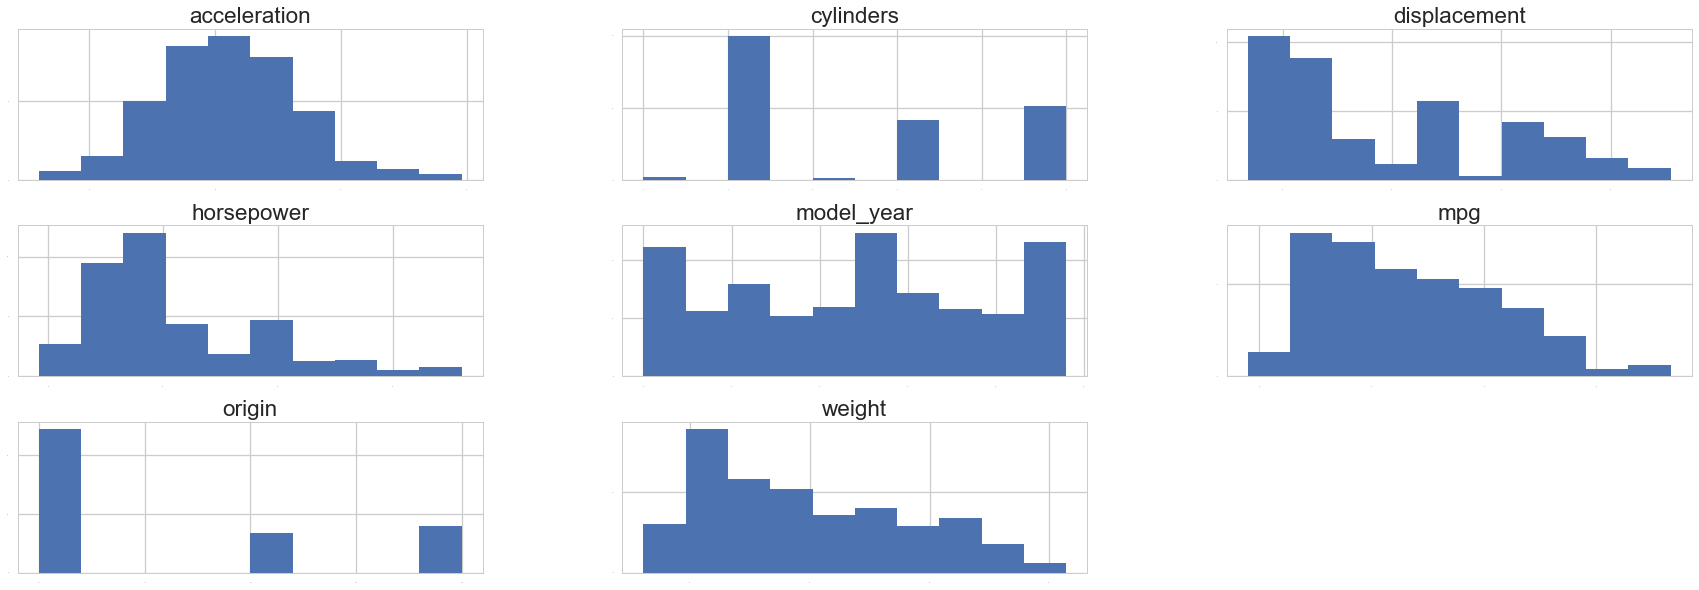

In [84]:
#histograms
#we can see from the histograms of a skewed gaussian distributions
dataset.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002086D8B7240>,
      dtype=object)

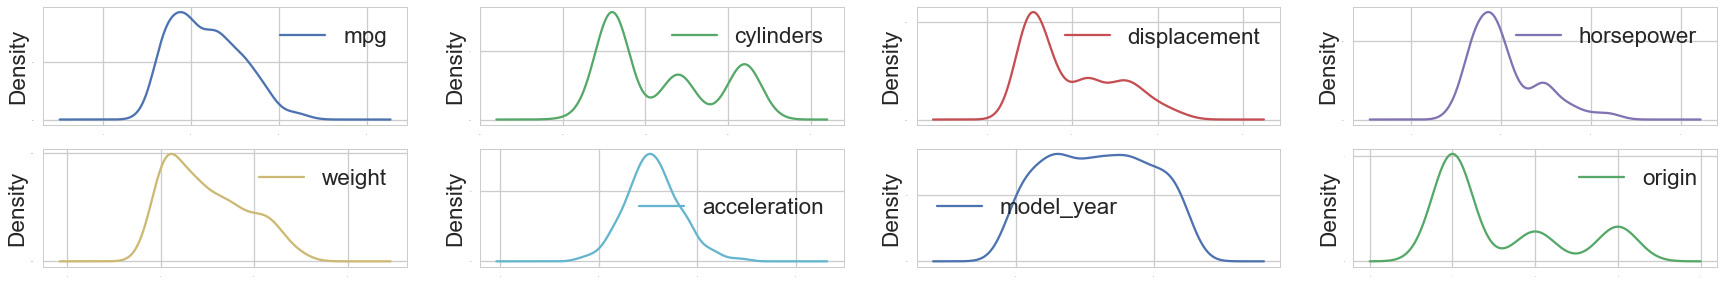

In [85]:
#density 
#We have a bimodal distribution of some features signaling skewness 
dataset.plot(kind='density',subplots=True,layout=(4,4),sharex=False,legend=True,fontsize=1)

mpg                AxesSubplot(0.125,0.657941;0.227941x0.222059)
cylinders       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
displacement    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
horsepower         AxesSubplot(0.125,0.391471;0.227941x0.222059)
weight          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
acceleration    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
model_year            AxesSubplot(0.125,0.125;0.227941x0.222059)
origin             AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

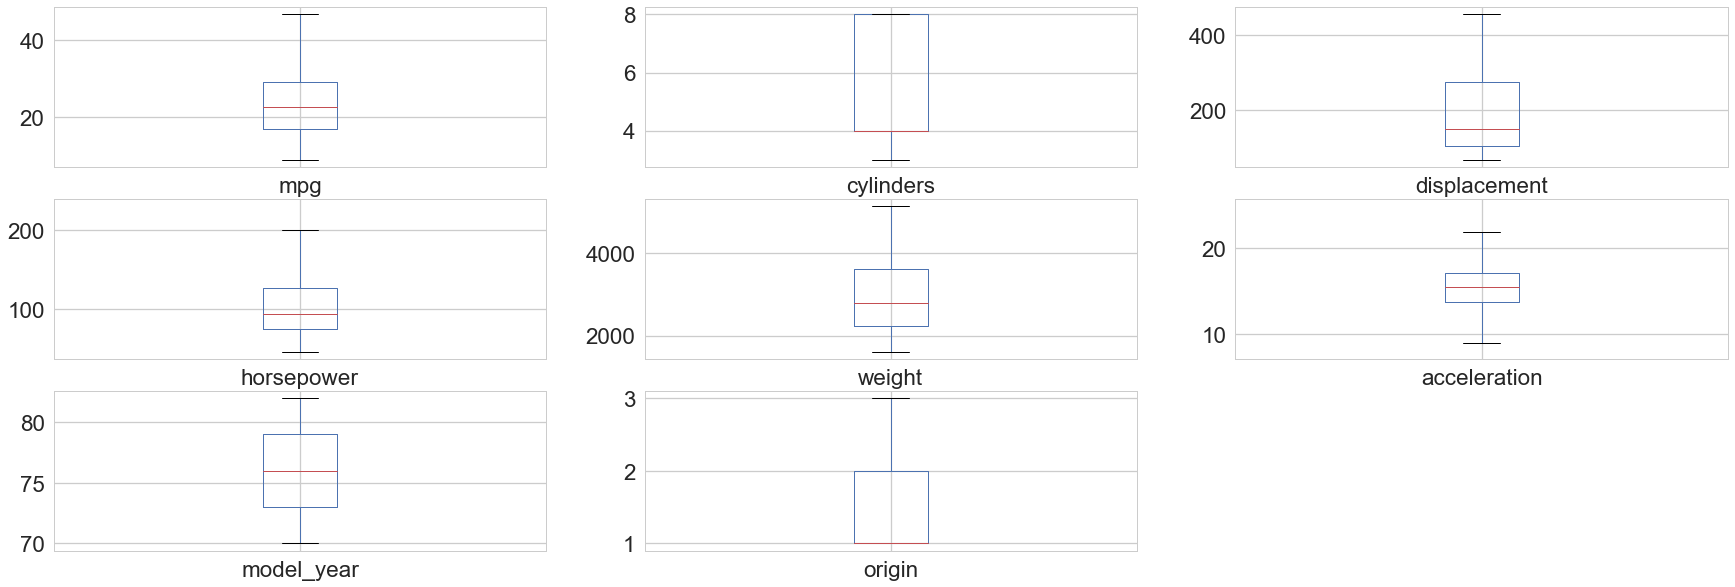

In [86]:
#Box and Whisker plots
#You see the skewness exhibted by cylinders,origin here as significant
dataset.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)

# Multimodal Data Visualizations

Average mpg by cylinders

In [87]:
mpg_cylinders_df = dataset.groupby('cylinders')['mpg'].mean().reset_index()

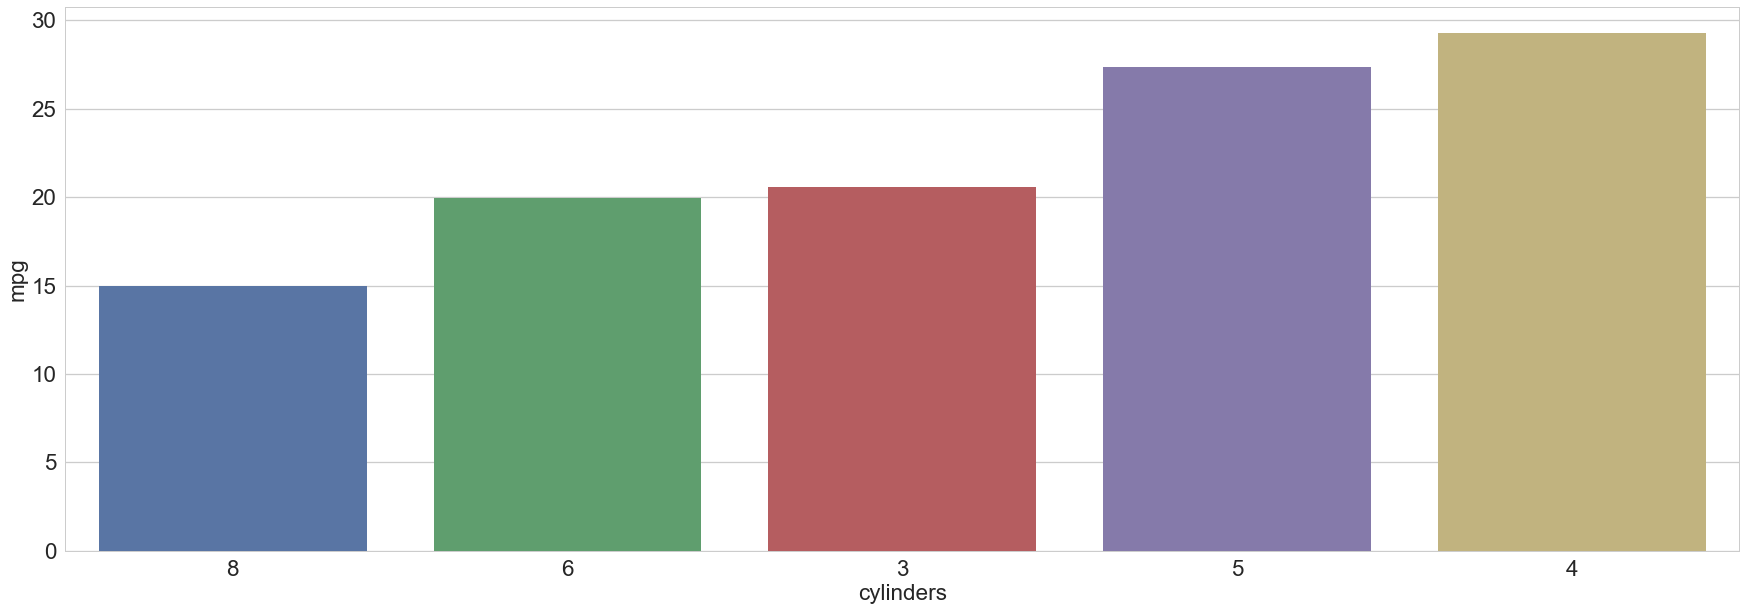

In [88]:
sn.barplot( y = 'mpg',x = 'cylinders',data = mpg_cylinders_df,
           order = mpg_cylinders_df.sort_values('mpg')['cylinders'])

Average mpg by cyinders and grouped by origin

In [89]:
mpg_cylinders_origin_df = dataset.groupby(['cylinders', 'origin'])['mpg'].mean().reset_index()
pd.set_option('precision',2)
print(mpg_cylinders_origin_df)

   cylinders  origin    mpg
0          3       3  20.55
1          4       1  28.01
2          4       2  28.11
3          4       3  31.60
4          5       2  27.37
5          6       1  19.65
6          6       2  20.10
7          6       3  23.88
8          8       1  14.96


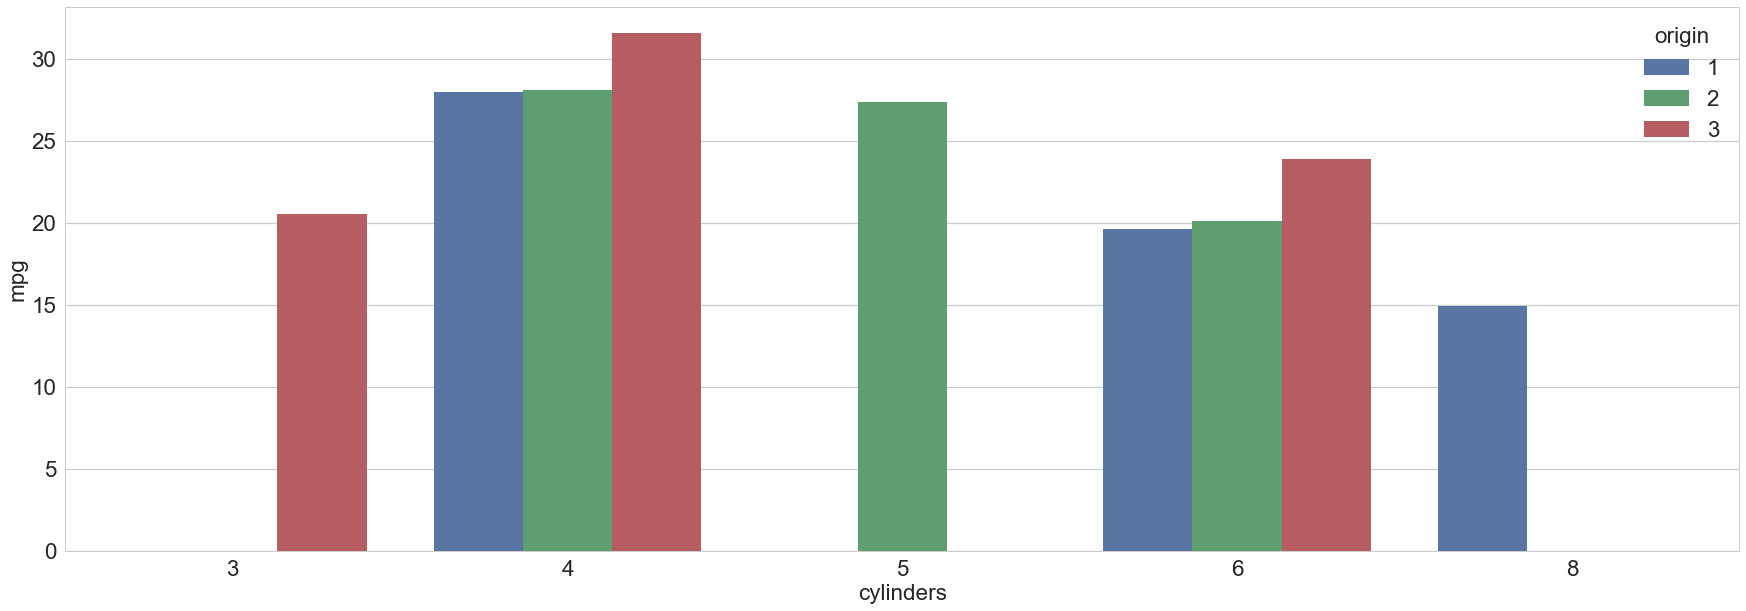

In [90]:
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_origin_df,
          hue = 'origin');

Trend in average MPG by year for different origin cars

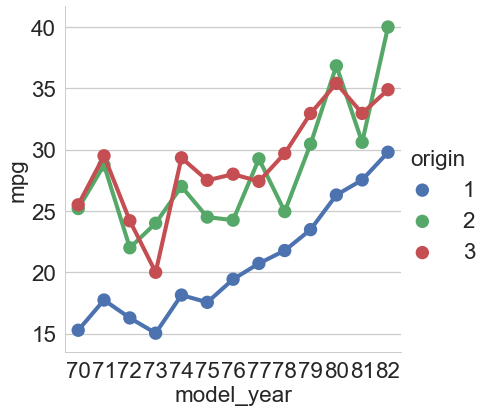

In [91]:
mpg_year_origin_df = dataset.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()
sn.factorplot( x = 'model_year', y = 'mpg', hue = 'origin', kind = 'point', data = mpg_year_origin_df,
              size = 6 )

Comparing mpg distributions of cars by different origin

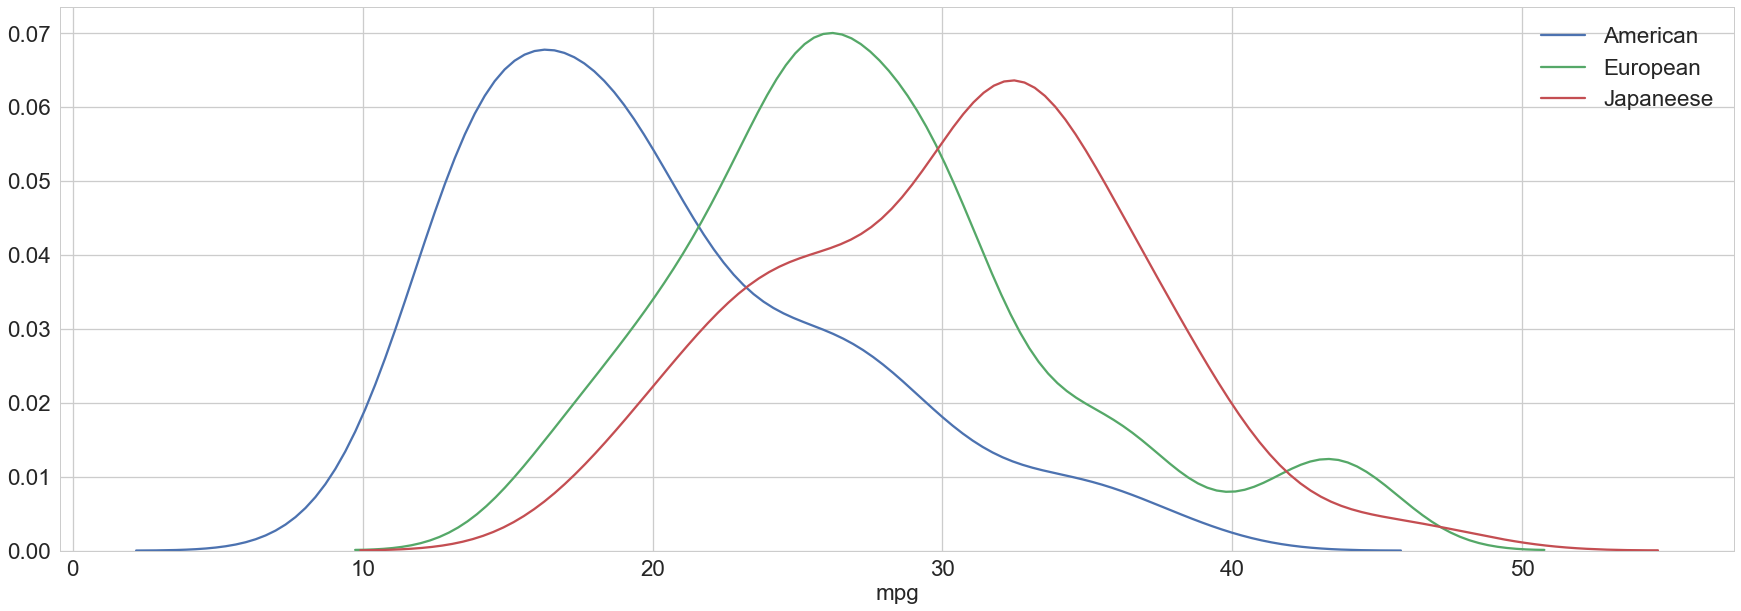

In [92]:
sn.distplot( dataset[dataset.origin == 1].mpg, hist = False, label= 'American' )
sn.distplot( dataset[dataset.origin == 2].mpg, hist = False, label= 'European' )
sn.distplot( dataset[dataset.origin == 3].mpg, hist = False, label= 'Japaneese' )

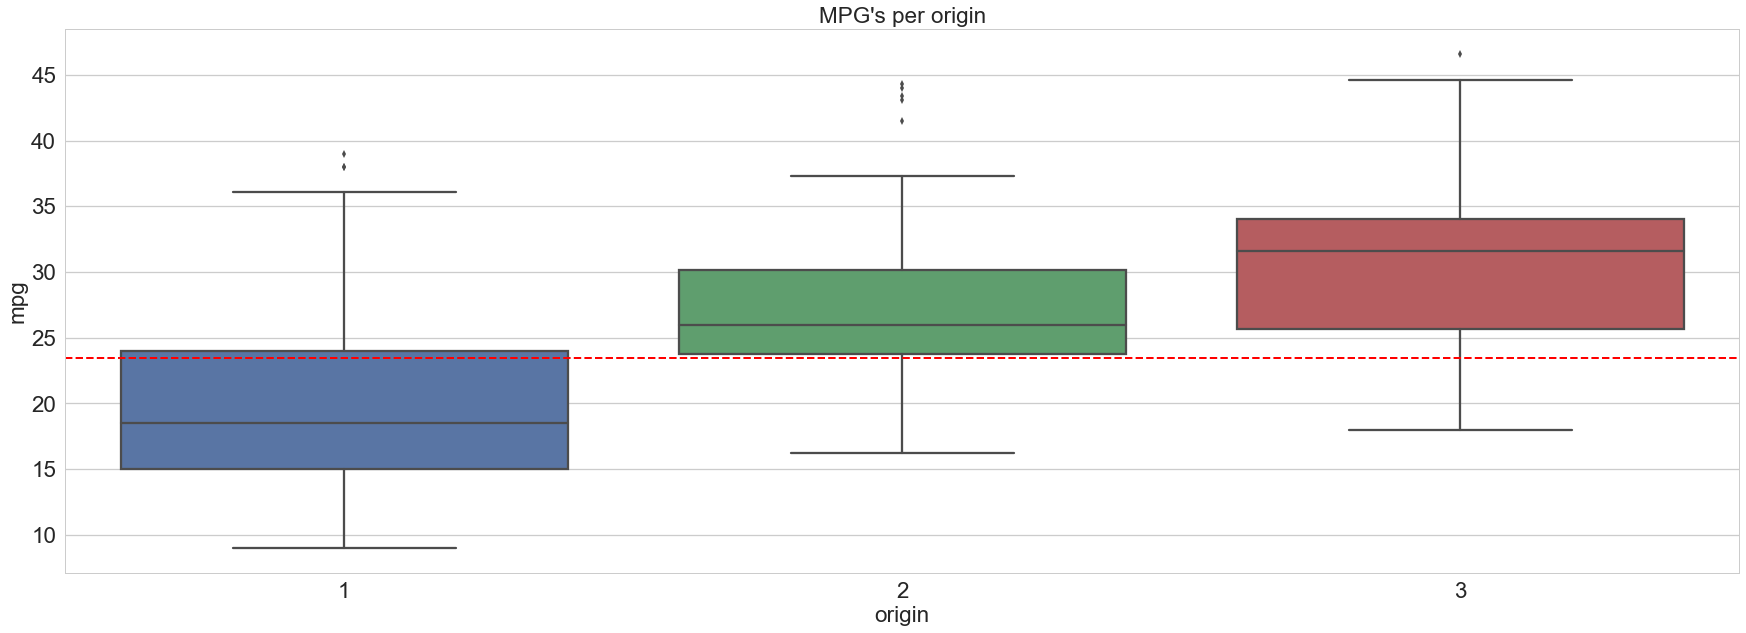

In [93]:
fig,ax = plt.subplots()
sn.boxplot(data=dataset[['origin','mpg']], x='origin',y='mpg',ax=ax)
ax.set(title="MPG's per origin")
plt.axhline(dataset.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

As we can see mpg is higher for foreign cars.

MPG per model year

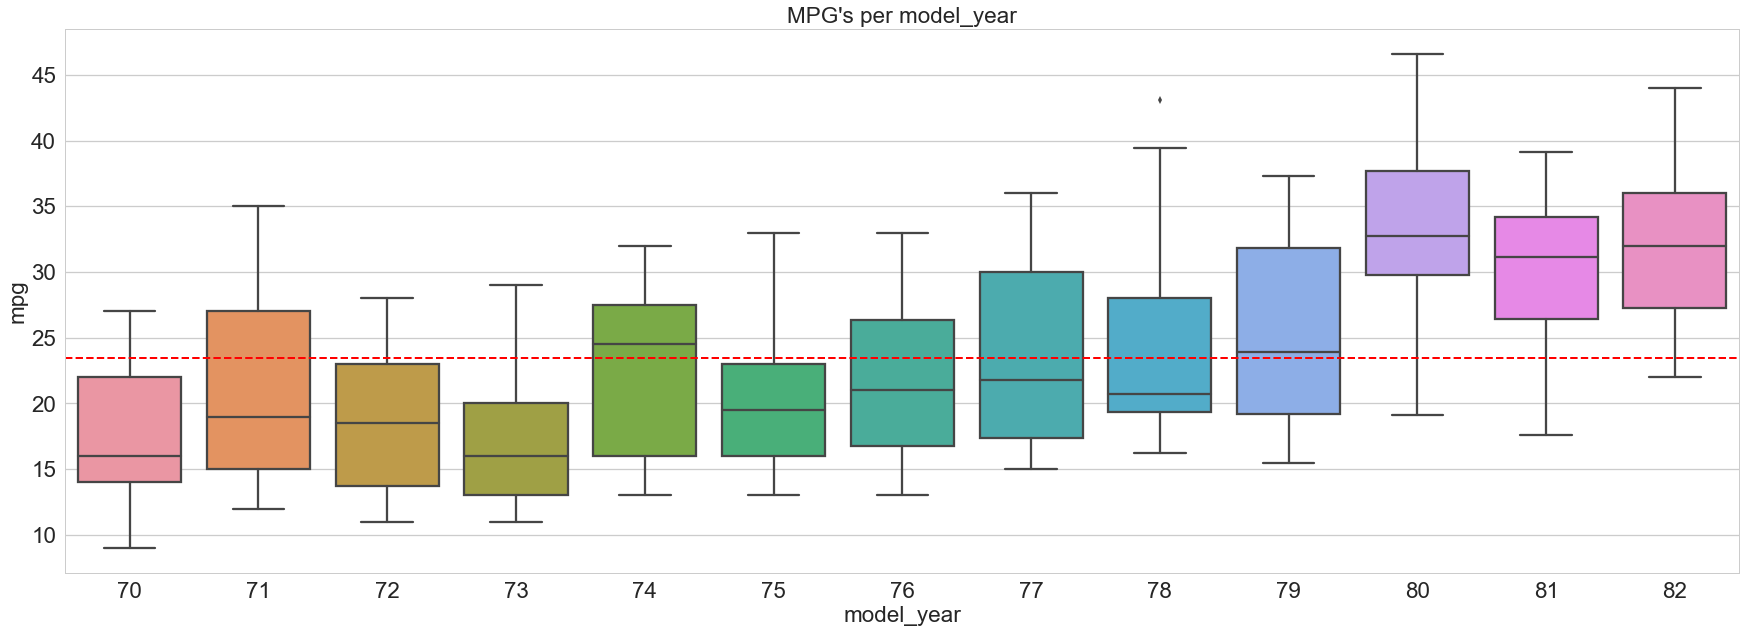

In [94]:
fig,ax = plt.subplots()
sn.boxplot(data=dataset[['model_year','mpg']], x='model_year',y='mpg',ax=ax)
ax.set(title="MPG's per model_year")
plt.axhline(dataset.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In general,mpg gets better over the years


MPG distribution for different number of cylinders.

Text(0.5,1,'Box plots for various cylinder counts')

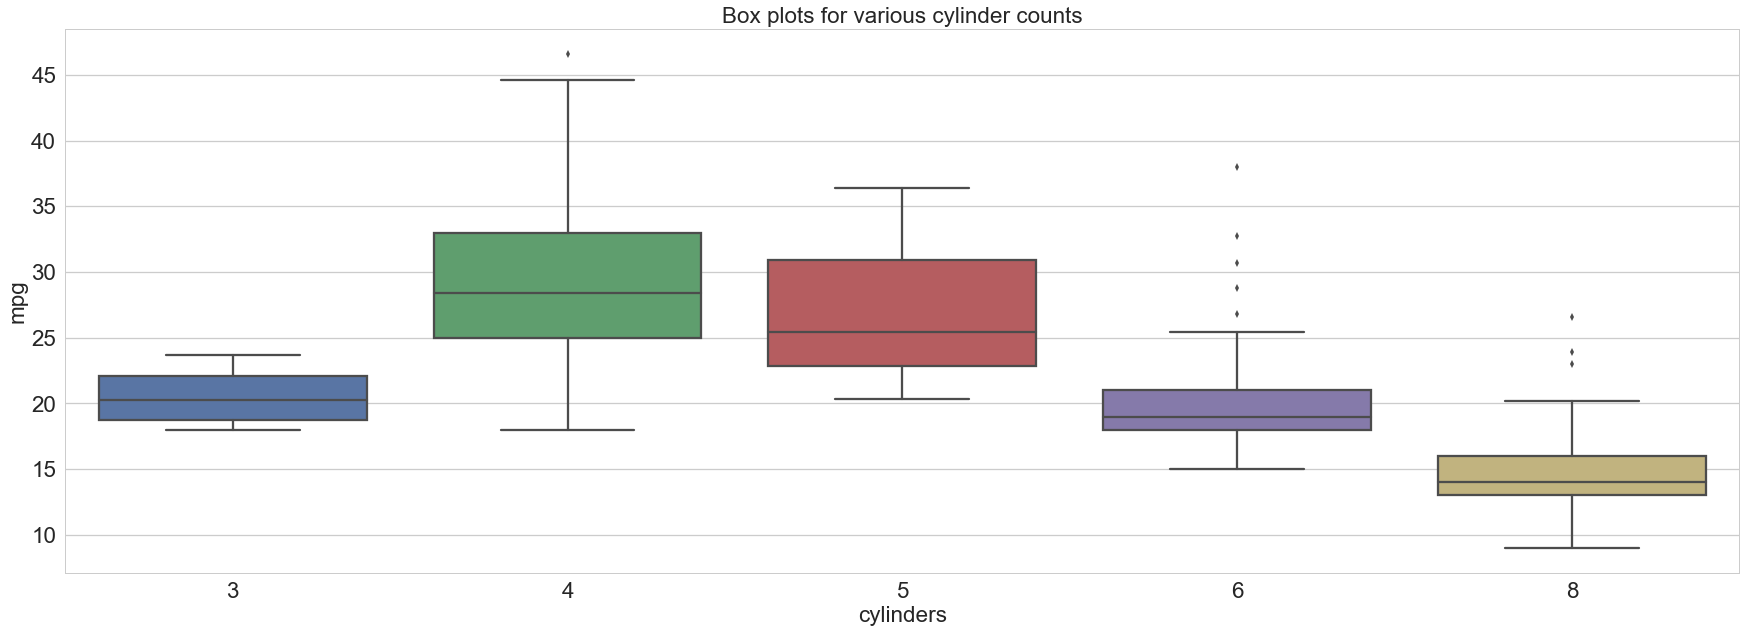

In [95]:
sn.boxplot( x = dataset.cylinders,
          y = dataset.mpg,order = dataset.cylinders.unique().sort() )
plt.title( "Box plots for various cylinder counts")

In general,we can see from the plot below mpg gets worse for higher cylinders and its the worst for eight cylinders

Horsepower distribution for different number of cylinders.

Text(0.5,1,'Box plots for various cylinder counts')

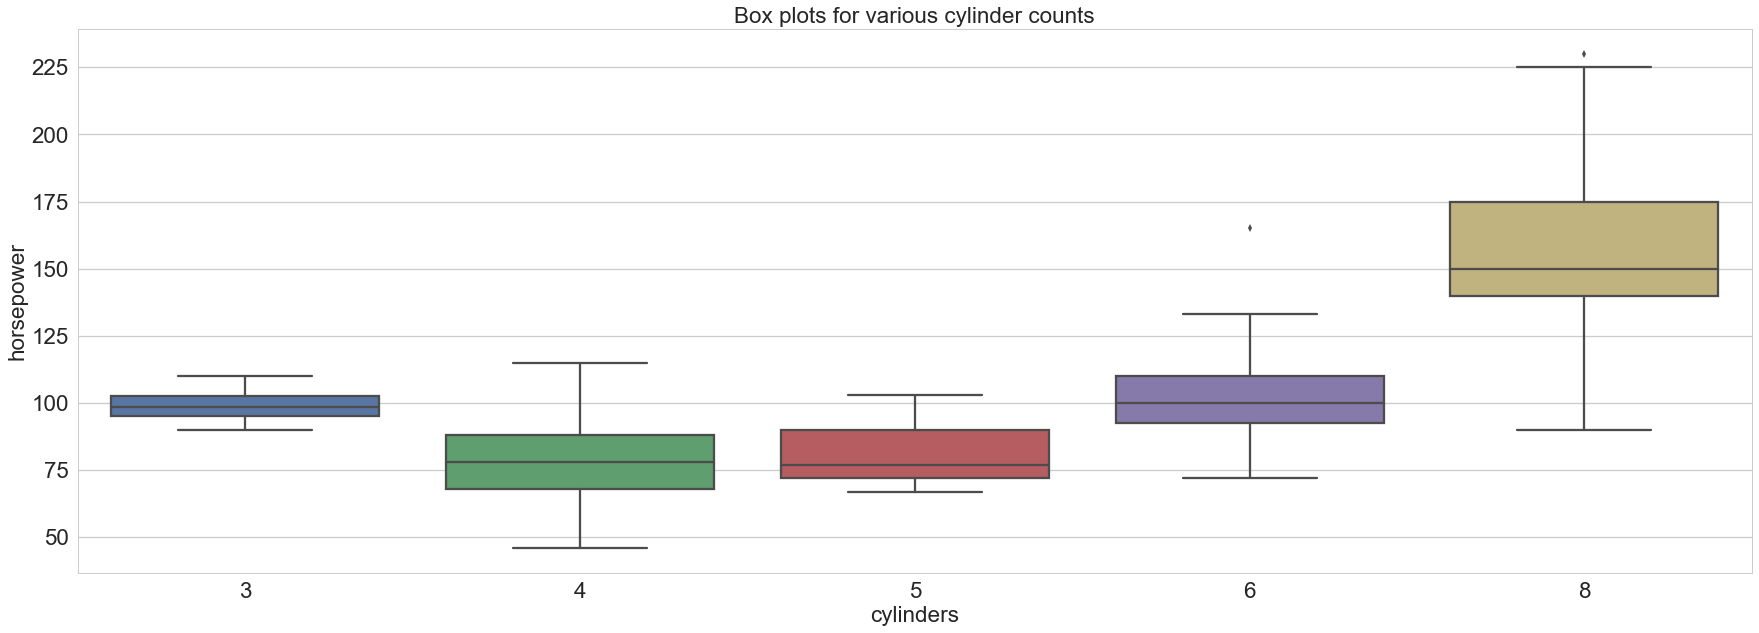

In [96]:
sn.boxplot( x = dataset.cylinders,
          y = dataset.horsepower,
          order = dataset.cylinders.unique().sort() )
plt.title( "Box plots for various cylinder counts")

As the number of cylinders increases to 4, mpg also increases and it starts to decrease after 4 cylinders.The more cylinders you add you get more power at the expense of mpg.

MPG distribution by company

In [97]:
print(dataset.index)

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car_name', length=392)


Using regular expressions to quickly extract the company from the index. The index is in the format 'COMPANY - SPACE -MODEL - SPACE -VARIANT' 

In [98]:
dataset["Company"]=dataset.index

In [99]:
dataset['Company'] = dataset["Company"].str.extract('(^.*?)\s')
dataset['Company']

car_name
chevrolet chevelle malibu             chevrolet
buick skylark 320                         buick
plymouth satellite                     plymouth
amc rebel sst                               amc
ford torino                                ford
ford galaxie 500                           ford
chevrolet impala                      chevrolet
plymouth fury iii                      plymouth
pontiac catalina                        pontiac
amc ambassador dpl                          amc
dodge challenger se                       dodge
plymouth 'cuda 340                     plymouth
chevrolet monte carlo                 chevrolet
buick estate wagon (sw)                   buick
toyota corona mark ii                    toyota
plymouth duster                        plymouth
amc hornet                                  amc
ford maverick                              ford
datsun pl510                             datsun
volkswagen 1131 deluxe sedan         volkswagen
peugeot 504                    

In [100]:
dataset.loc[dataset['Company']=='volkswagen','Company']='VW'
dataset.loc[dataset['Company']=='vokswagen','Company']='VW'
dataset.loc[dataset['Company']=='vw','Company']='VW'
dataset.loc[dataset['Company'] =='maxda','Company']='mazda'
dataset.loc[dataset['Company'] == 'toyouta','Company']='toyota'
dataset.loc[dataset['Company'] =='mercedes','Company']='mercedes-benz'
dataset.loc[dataset['Company'] == 'nissan','Company']='datsun'
dataset.loc[dataset['Company'] =='capri','Company']='ford'
dataset.loc[dataset['Company'] =='chevroelt','Company']='chevrolet'
dataset.loc[dataset['Company'] =='chevy','Company']='chevrolet'
dataset['Company'].fillna(value ='subaru',inplace=True) 

In [101]:
print(dataset['Company'])

car_name
chevrolet chevelle malibu             chevrolet
buick skylark 320                         buick
plymouth satellite                     plymouth
amc rebel sst                               amc
ford torino                                ford
ford galaxie 500                           ford
chevrolet impala                      chevrolet
plymouth fury iii                      plymouth
pontiac catalina                        pontiac
amc ambassador dpl                          amc
dodge challenger se                       dodge
plymouth 'cuda 340                     plymouth
chevrolet monte carlo                 chevrolet
buick estate wagon (sw)                   buick
toyota corona mark ii                    toyota
plymouth duster                        plymouth
amc hornet                                  amc
ford maverick                              ford
datsun pl510                             datsun
volkswagen 1131 deluxe sedan                 VW
peugeot 504                    

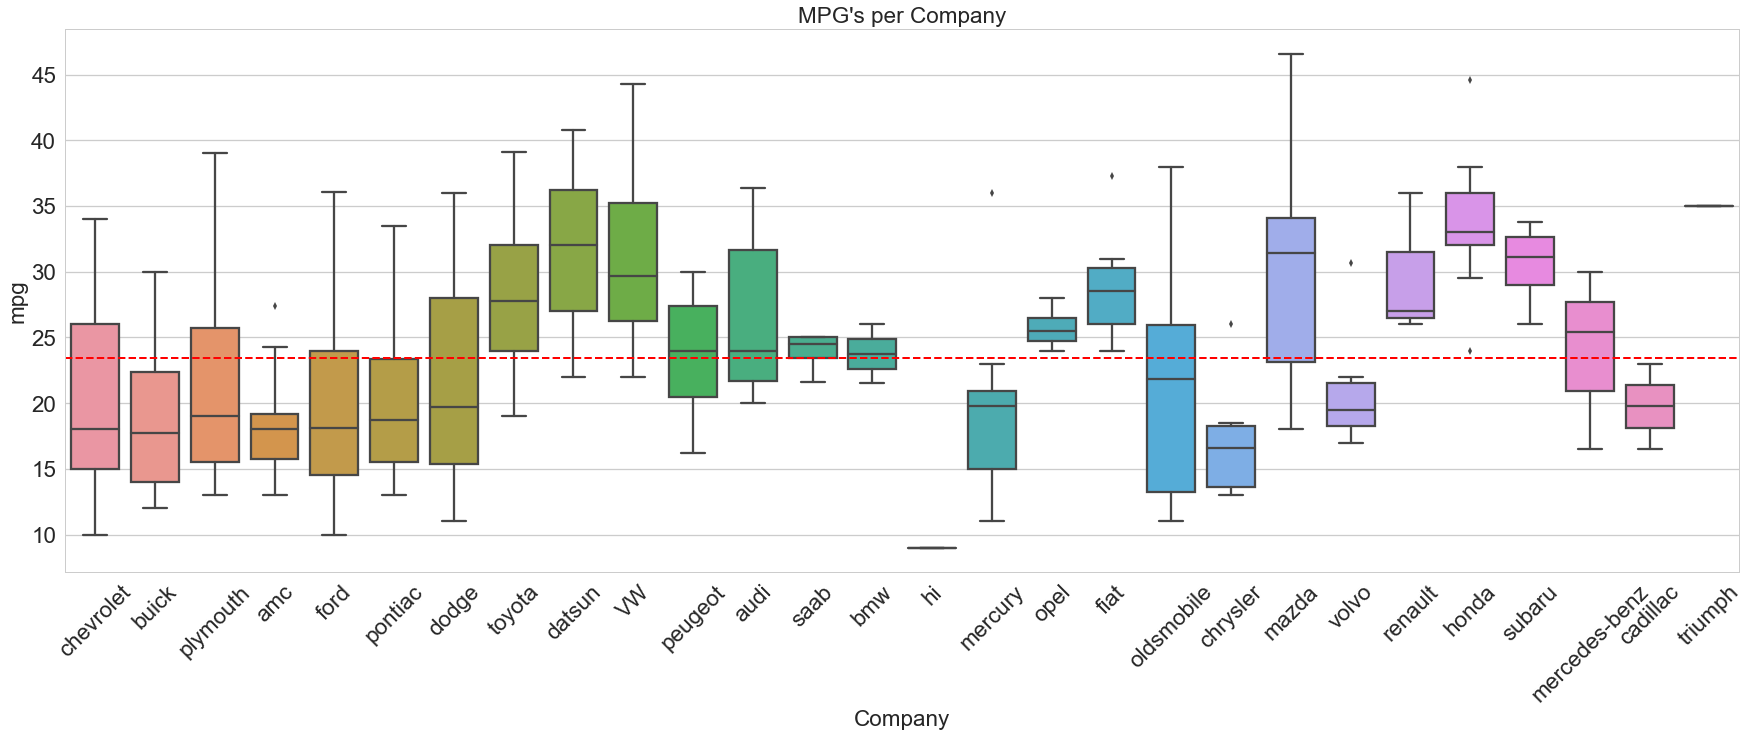

In [102]:
fig,ax = plt.subplots()
fig=sn.boxplot(data=dataset[['Company','mpg']],x='Company',y='mpg',ax=ax)
ax.set(title="MPG's per Company")
fig.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.axhline(dataset.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

As we can see from the above plot foreign companies produce cars with a better mpg especially asian cars.The collinarity between the different features might help us simplify our analysis. If we have a very strong correlation between any two features , we could drop one of them.



Text(0,0.5,'mpg')

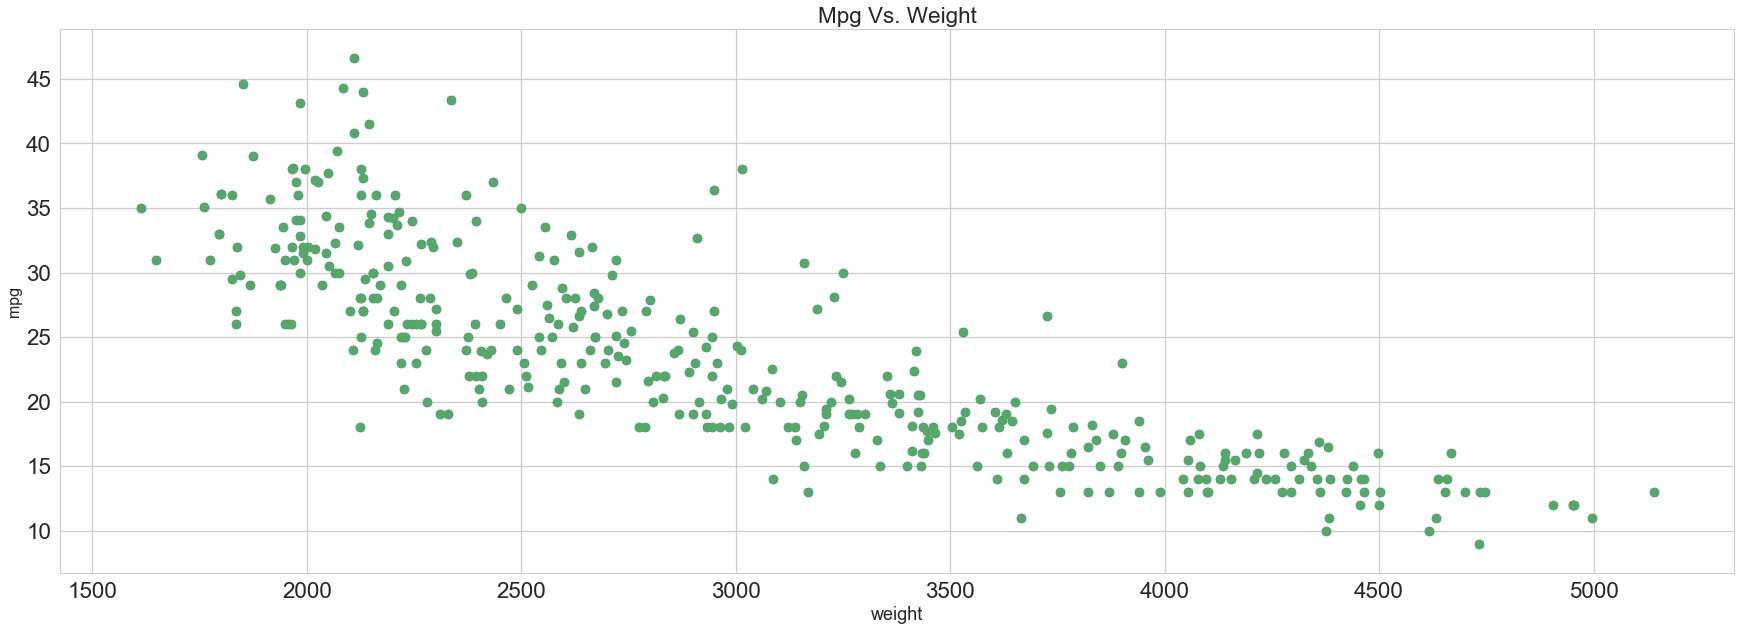

In [103]:
# Creating scatter plots - weight vs. mpg
plt.scatter( dataset.weight,dataset.mpg );
#Setting titles, x label, y lable & saving image to file
plt.scatter( dataset.weight, dataset.mpg )
plt.title("Mpg Vs. Weight")
plt.xlabel('weight', fontsize=18)
plt.ylabel('mpg', fontsize=16)


# Multivariate distribution plot

Visualizing the correlation between more than 2 variables, pair-wise at same time.

<Figure size 432x432 with 0 Axes>

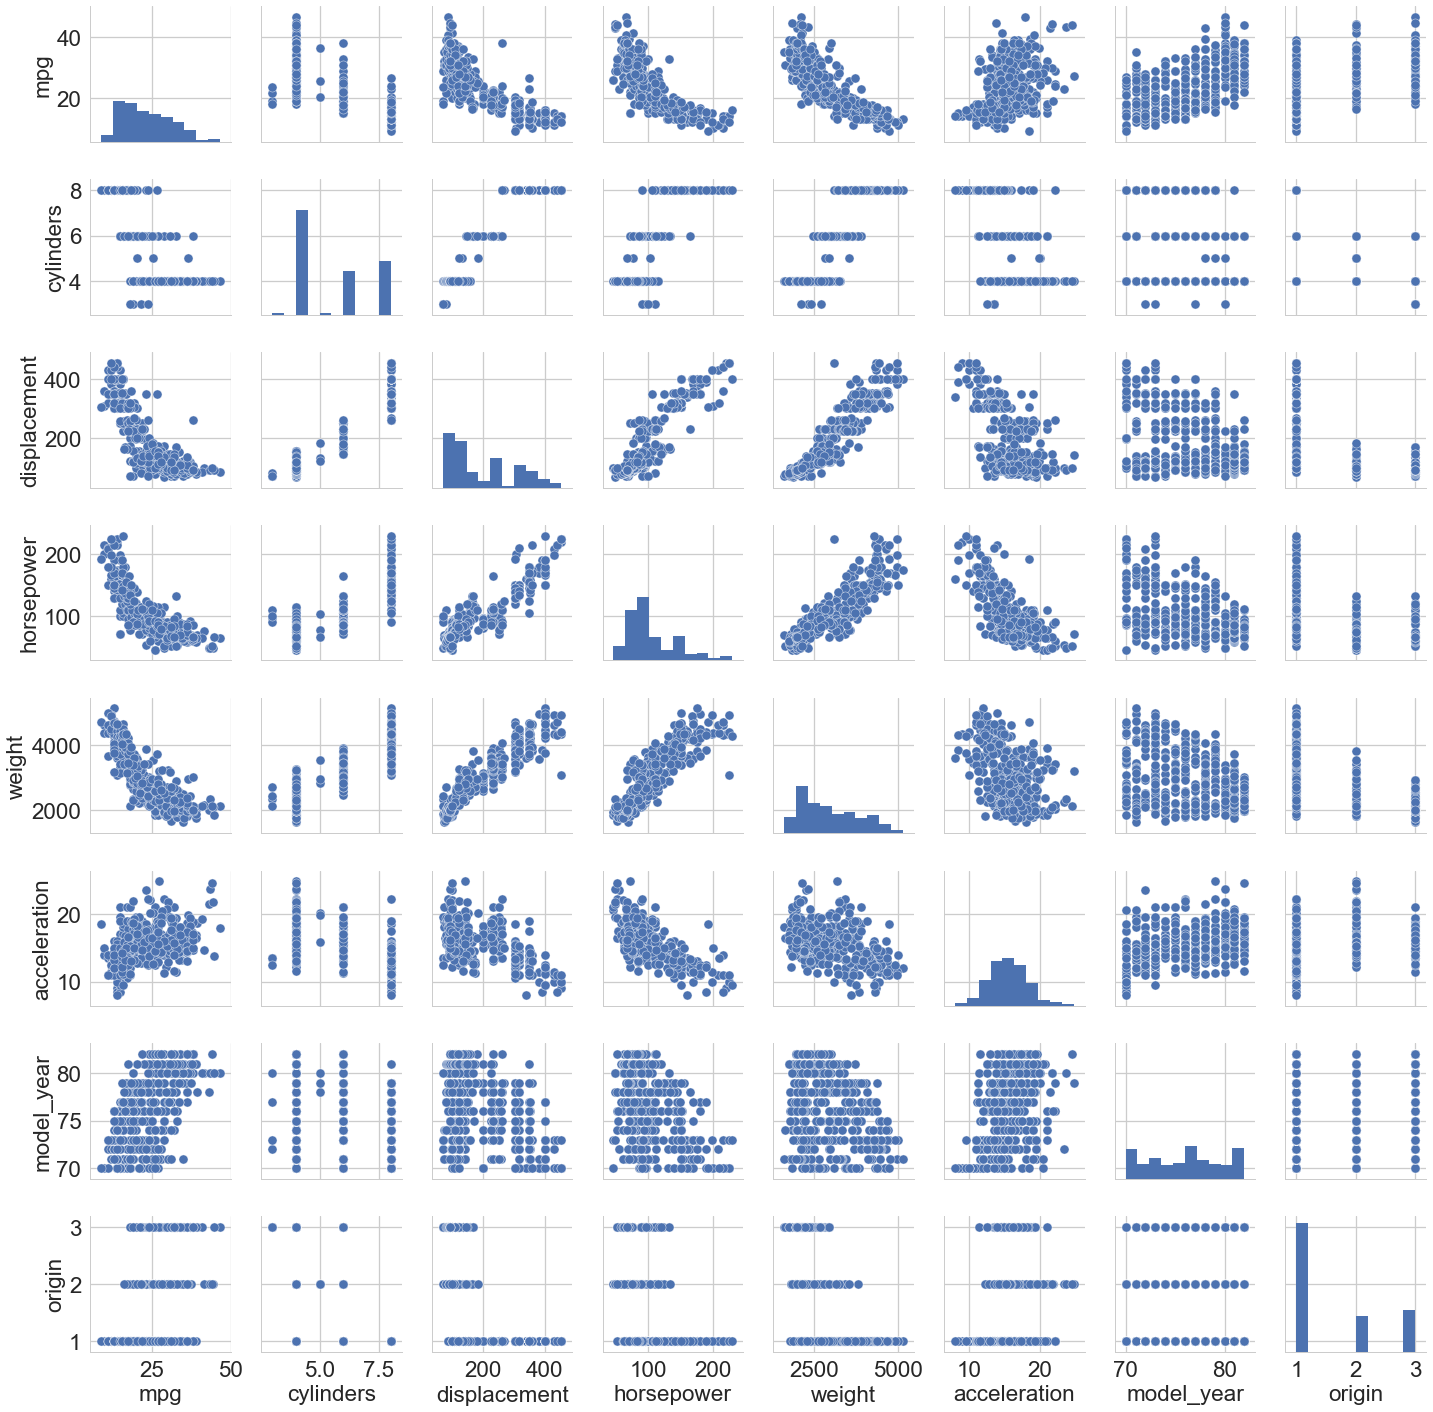

In [104]:
plt.figure( figsize = (6,6));
sn.pairplot( dataset);
       

Creating a heatmap to depict correlations

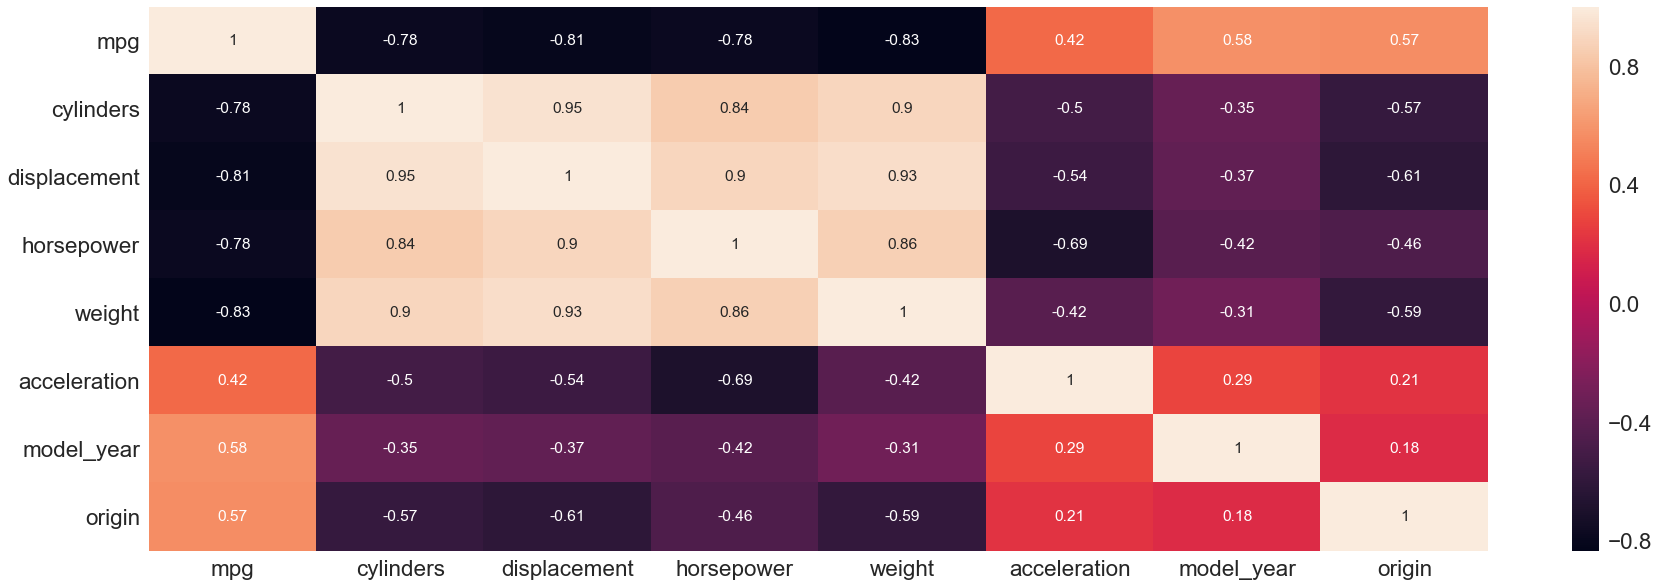

In [105]:
#The dark blue color shows negative correlation whereas the light tan color shows positive correlation
sn.heatmap(dataset.corr(),annot=True) 
    

As we can see from the heat map acceleration has a weaker correlation with mpg than the other factors. horsepower has a strong correlation with acceleration and weight. Displacement has a strong correlation with weight and horsepower.We see correlated attributes that may need feature selection and removal
to better improve accuracy of models

# How American cars' mpg compared to foreign cars?

In [106]:
from scipy import stats
#Start with European cars
stats.ttest_ind( dataset[dataset.origin == 1]["mpg"],dataset[dataset.origin == 2 ]["mpg"],equal_var=True)

Ttest_indResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16)

In [107]:
#Compare with Japenese cars
stats.ttest_ind( dataset[dataset.origin == 1]["mpg"],dataset[dataset.origin == 3]["mpg"],equal_var=True)


Ttest_indResult(statistic=-12.664889006229084, pvalue=4.17283714676552e-30)

As p-value is less than 0.05 in both cases. We can say that average mpg for american cars are different than average mpg for Foreign.

As we can see from the above plot foreign companies produce cars with a better mpg especially asian cars.

The collinarity between the different features might help us simplify our analysis. If we have a very strong correlation between any two features , we could drop one of them. 

# Summary of Ideas

Efficiency measured by mpg improved over years for different cars of every origin i.e. whether its foreign made or US made. The measure of effieciency measured by mpg as compared to cylinders shows mpg decreases as the cylinders increase. When we compare cars of the same year by origin the US cars are less efficient or have less mpg than the foreign made cars. Last but not least, foreign model cars are more efficient as compared to US model cars. 

# Validation Dataset

In [108]:
# Split-out validation dataset
#We use a validation hold-out set. This is a sample of the data that we hold back from our analysis
#and modeling. We use it at the end of our project to confirm the accuracy of our final model.
#Its a smoke test that we can use to see if we messed up and to give us confidence on our estimates
#of accuracy on unseen data. We will use 80% of the dataset for modelling and holdback 20%for validation.
array = dataset.values
X = array[:,1:8]
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
                                                    test_size=validation_size, random_state=seed)

# Evaluate Algorithms:Baseline

In [109]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [110]:
#Because our dataset is relatively not very large. We test the following algorithms on the dataset
#Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet
#(EN) and Nonlinear Algorithms: Classication and Regression Trees (CART), Support Vector
#Regression (SVR) and k-Nearest Neighbors (KNN).
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [111]:
# evaluate each model 
#The algorithms all use default tuning parameters.Let's compare the algorithms.
#We will display the mean and standard deviation of MSE for each algorithm as we calculate it
#and collect the results for use later
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    #It looks like LR has the lowest MSE followed by EN, LASSO

LR: -11.586393 (3.231469)
LASSO: -12.330848 (3.801819)
EN: -12.305590 (3.777668)
KNN: -17.642112 (6.747861)
CART: -14.174737 (7.798892)
SVR: -63.313950 (12.454792)


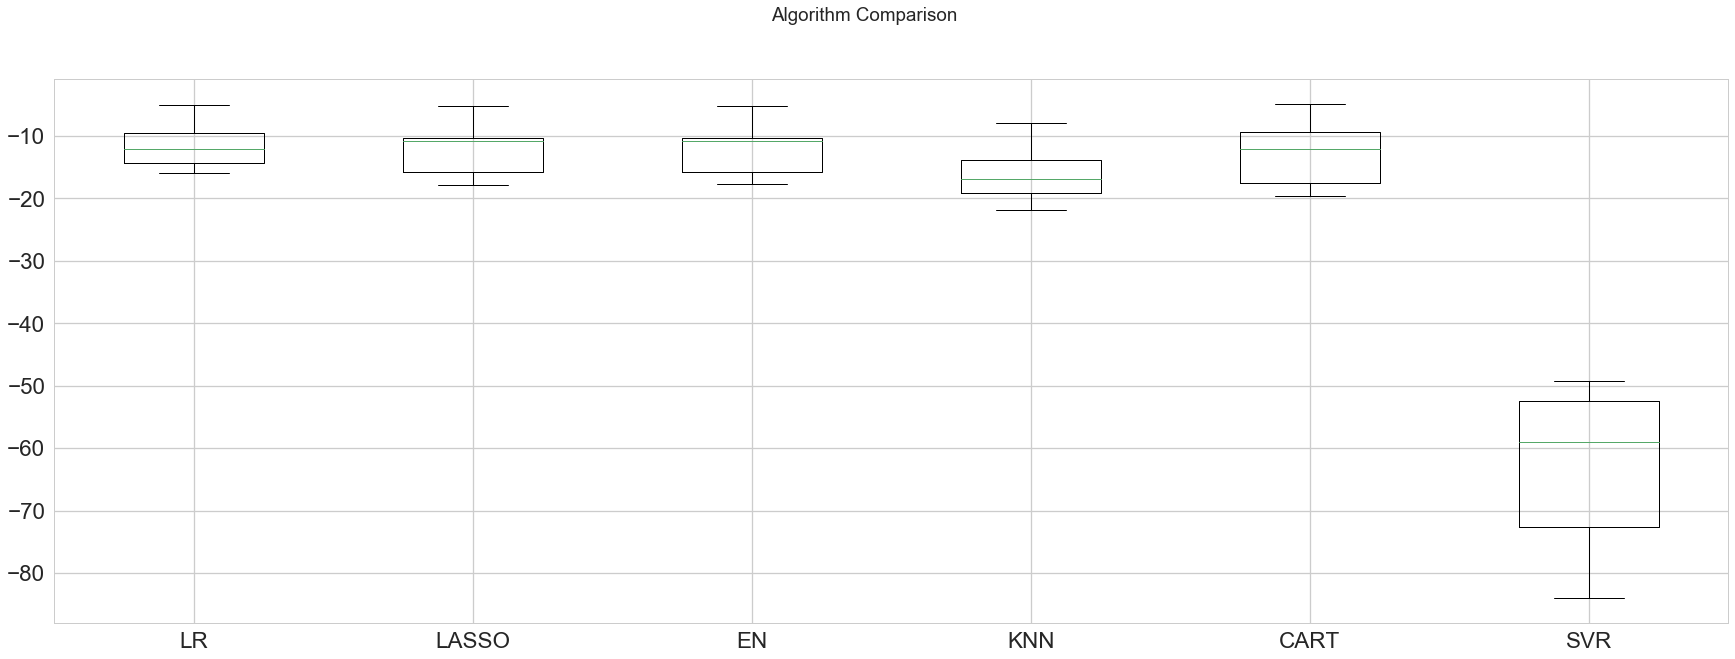

In [112]:
# Compare Algorithms
#Let's take a look at the distribution of scores across all cross validation folds by algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#we can see a tighter distribution for all algorithms except for SVR

# Evaluate Algorithms:Standardization

In [113]:
# Standardize the dataset
#The Differing scales of the raw data may be negatively impacting the skill of some of the algorithms. 
#Let's evaluate the same algorithms with a standardize copy of the dataset. This is where the data is
#is transformed such that each attribute has a mean value of zero and a standard deviation of 1.
#We use piplines that standardize the data and build the model for each fold in the cross validation
#test harness to avoid data leakage when we transform the data.We could get a fair estimation of how
#each model with standardize data might perform on unseen data
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    #We can see that scaling did have an effect on KNN,driving the error  lower than the other models

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionW

ScaledLR: -11.586393 (3.231469)
ScaledLASSO: -13.248069 (4.181549)
ScaledEN: -15.102082 (4.309841)
ScaledKNN: -9.387834 (4.219105)
ScaledCART: -14.412478 (7.868971)
ScaledSVR: -10.052114 (4.372222)


C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionW

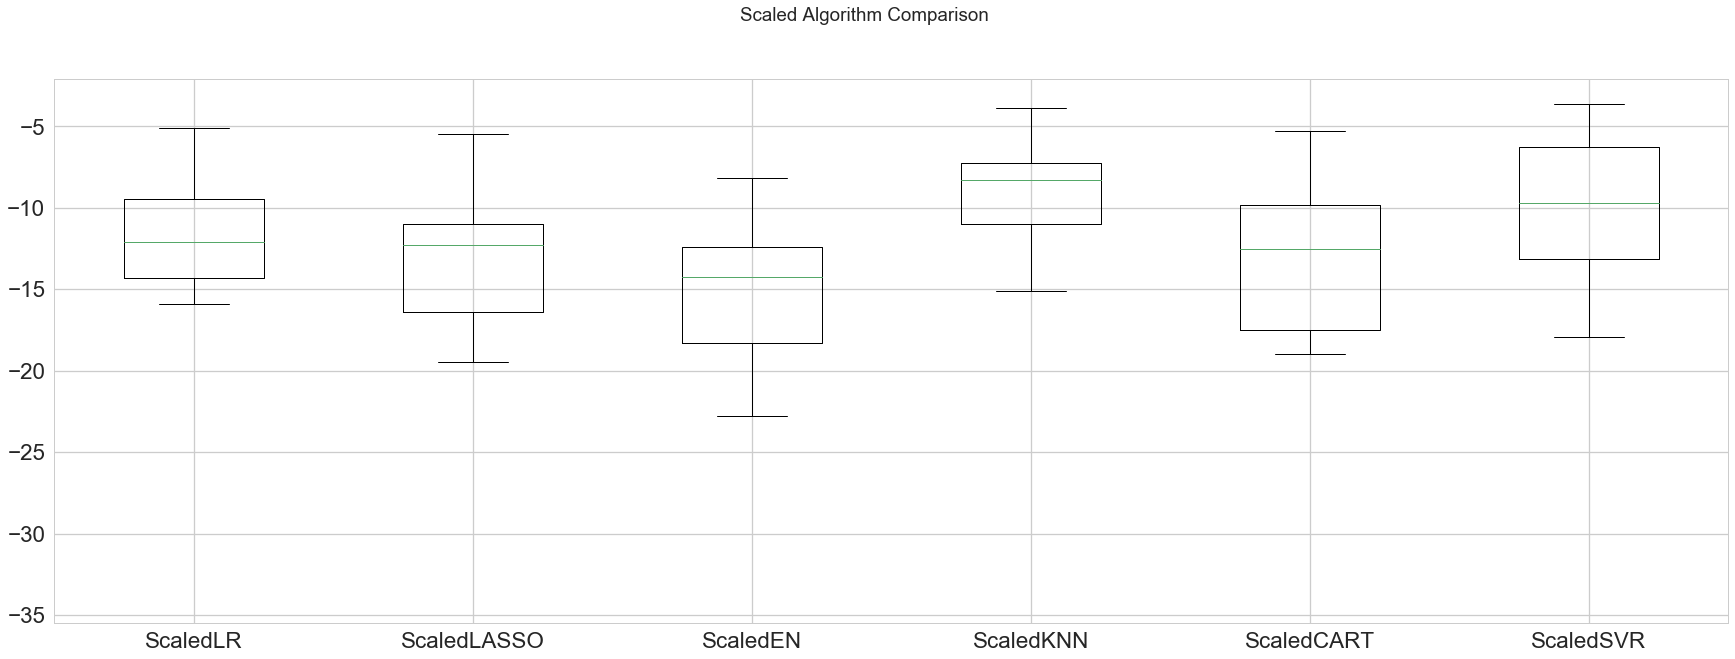

In [114]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#We can see that KNN has both a tight distribution of error and has the lowest score

# Improve Results With Tuning

In [115]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [116]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#Each k value(n_neighbors ) is evaluated using 10-fold cross validation on a standardized copy 
#of the training dataset. We got the lowest mean squared error when k(n_neighbors)=9

Best: -8.818612 using {'n_neighbors': 9}
-14.090927 (8.660661) with: {'n_neighbors': 1}
-10.668733 (4.366858) with: {'n_neighbors': 3}
-9.450861 (4.299207) with: {'n_neighbors': 5}
-8.954574 (3.549990) with: {'n_neighbors': 7}
-8.818612 (3.651798) with: {'n_neighbors': 9}
-9.221423 (3.654936) with: {'n_neighbors': 11}
-9.579297 (3.516428) with: {'n_neighbors': 13}
-9.931638 (3.755837) with: {'n_neighbors': 15}
-10.103984 (3.780919) with: {'n_neighbors': 17}
-10.080006 (3.860233) with: {'n_neighbors': 19}
-10.266504 (4.059721) with: {'n_neighbors': 21}


In [117]:
#Let's use ensembles to improve the performance of the algorithms
#We use boosting and bagging methods
#AdaBoost(AB) and Gradient Boosting(GBM)
#Random Forests(RF) and Extra Trees
#Running the example calculates the mean squared error for each method using the default
#parameters.
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#We generally get better scores than our linear and linear counterparts.

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionW

ScaledAB: -8.997531 (2.881027)


C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionW

ScaledGBM: -7.405246 (3.247048)


C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionW

ScaledRF: -7.976716 (3.650406)
ScaledET: -7.784433 (3.697453)


C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionW

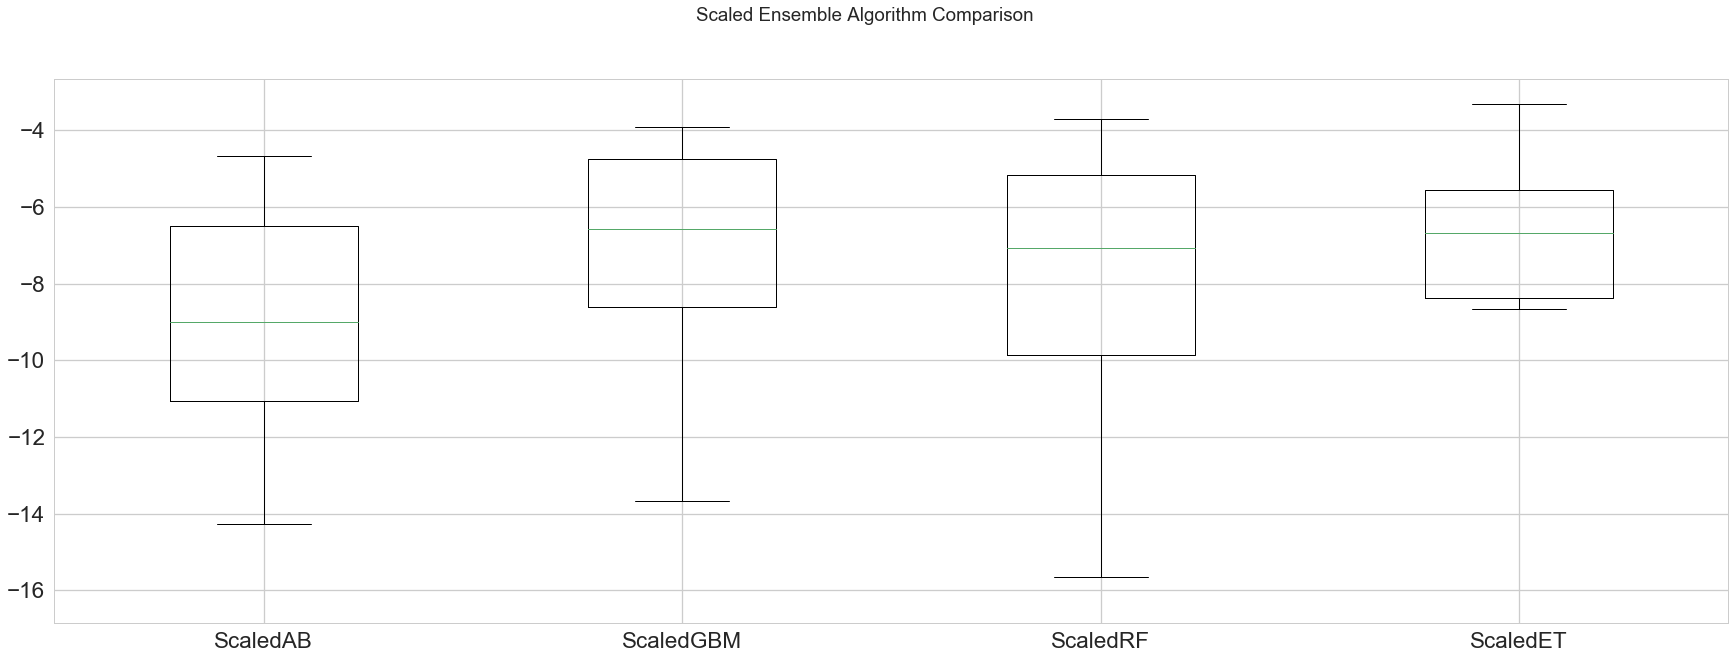

In [118]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
#It looks like Gradient boosting has a better mean score,
#It also looks like Extra Trees has a similar distribution and perhaps a better median score.

In [119]:
# Tune scaled GBM
#The default number of boosting stages to perform (n estimators) is 100. This is a good
#candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting
#stages, the better the performance but the longer the training time. Let's try a parameter grid
#n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold
#cross validation.
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [123]:
# we can summarize the best conguration and get an idea of how performance
#changed with each differerent configuration.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#We can see that the best configuration was n estimators=200 resulting in a mean squared
#error of  -7.393682, which is better than the untuned method.  


Best: -7.393682 using {'n_estimators': 200}
-7.509141 (3.166583) with: {'n_estimators': 50}
-7.472233 (3.246133) with: {'n_estimators': 100}
-7.426801 (3.413325) with: {'n_estimators': 150}
-7.393682 (3.446042) with: {'n_estimators': 200}
-7.473074 (3.488500) with: {'n_estimators': 250}
-7.506836 (3.427577) with: {'n_estimators': 300}
-7.524834 (3.490844) with: {'n_estimators': 350}
-7.547734 (3.465283) with: {'n_estimators': 400}


# Finalize Model

In [124]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=200)
model.fit(rescaledX, Y_train)

C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=7,
             subsample=1.0, verbose=0, warm_start=False)

In [125]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

8.75222093471515


C:\Users\seid\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


We can see that the estimated mean squared error 8.752222 close to our estimate of 7.393682